In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()

import warnings
warnings.filterwarnings('ignore')


In [66]:
rand_state=1000

In [67]:
read_file = pd.read_csv(r'C:\Users\atsed\Desktop\Thesis_Reg\AOI_hitStimuli2Polygon1.txt') 

In [68]:
read_file.to_csv (r'C:\Users\atsed\Desktop\Thesis_Reg\AOI_hitStimuli2Polygon1.csv', index=None)

In [69]:
df = pd.read_table('AOI_hitStimuli2Polygon1.csv')

In [70]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli2_Polygon1
0,Skilled,606,219,416,614,221,0
1,Skilled,607,227,416,614,221,0
2,Skilled,614,225,416,614,221,0
3,Skilled,616,227,416,614,221,0
4,Skilled,614,225,416,614,221,0


In [71]:
df.nunique()

Skill_level                    2
Gaze_point_X                 627
Gaze_point_Y                 664
Gaze_event_duration          116
Fixation_point_X             375
Fixation_point_Y             490
AOI_hit_Stimuli2_Polygon1      2
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26498 entries, 0 to 26497
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Skill_level                26498 non-null  object
 1   Gaze_point_X               26498 non-null  int64 
 2   Gaze_point_Y               26498 non-null  int64 
 3   Gaze_event_duration        26498 non-null  int64 
 4   Fixation_point_X           26498 non-null  int64 
 5   Fixation_point_Y           26498 non-null  int64 
 6   AOI_hit_Stimuli2_Polygon1  26498 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.4+ MB


In [73]:
df.isna().sum()

Skill_level                  0
Gaze_point_X                 0
Gaze_point_Y                 0
Gaze_event_duration          0
Fixation_point_X             0
Fixation_point_Y             0
AOI_hit_Stimuli2_Polygon1    0
dtype: int64

In [74]:
df.describe()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli2_Polygon1
count,26498.000000,26498.000000,26498.000000,26498.000000,26498.000000,26498.000000
mean,643.718130,330.345007,602.967507,643.684769,330.370556,0.365537
std,111.420138,141.526528,543.395672,111.037920,141.086568,0.481590
min,189.000000,-94.000000,66.000000,195.000000,-81.000000,0.000000
25%,596.000000,206.000000,250.000000,597.000000,204.000000,0.000000
50%,682.000000,334.000000,416.000000,686.000000,335.000000,0.000000
75%,722.000000,424.000000,765.000000,722.000000,423.000000,1.000000
max,1637.000000,954.000000,3411.000000,1626.000000,948.000000,1.000000


<Figure size 600x400 with 0 Axes>

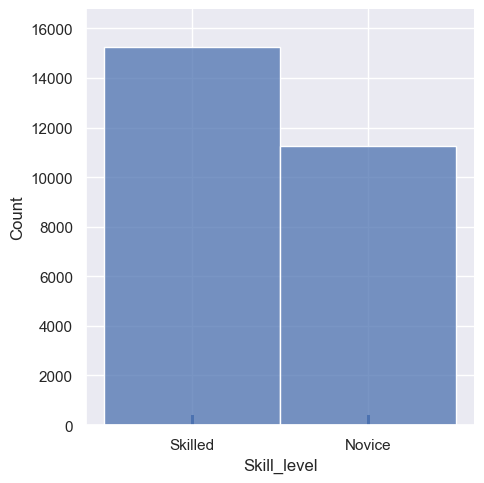

In [75]:
plt.figure(figsize=(6,4))
sns.displot(df['Skill_level'], rug=True)
plt.show()

In [13]:
ordinal_categoricals = ['Skill_level']

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
enc = OrdinalEncoder()

In [16]:
df[ordinal_categoricals] = enc.fit_transform(df[ordinal_categoricals])

In [17]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli2_Polygon1
0,1.0,606,219,416,614,221,0
1,1.0,607,227,416,614,221,0
2,1.0,614,225,416,614,221,0
3,1.0,616,227,416,614,221,0
4,1.0,614,225,416,614,221,0


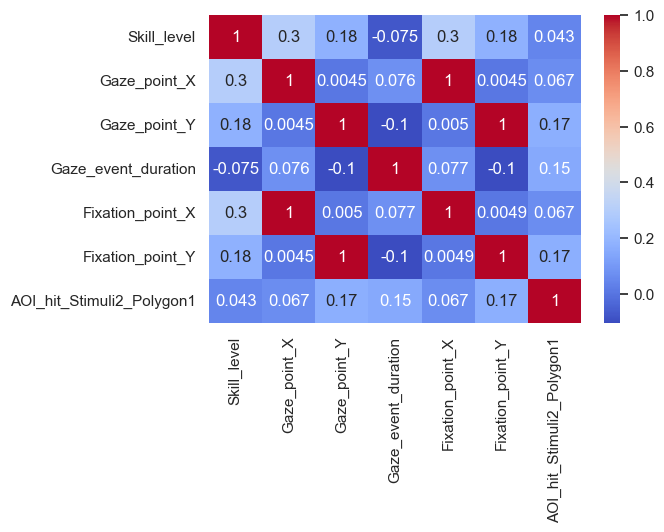

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

CPU times: total: 14.8 s
Wall time: 15.9 s


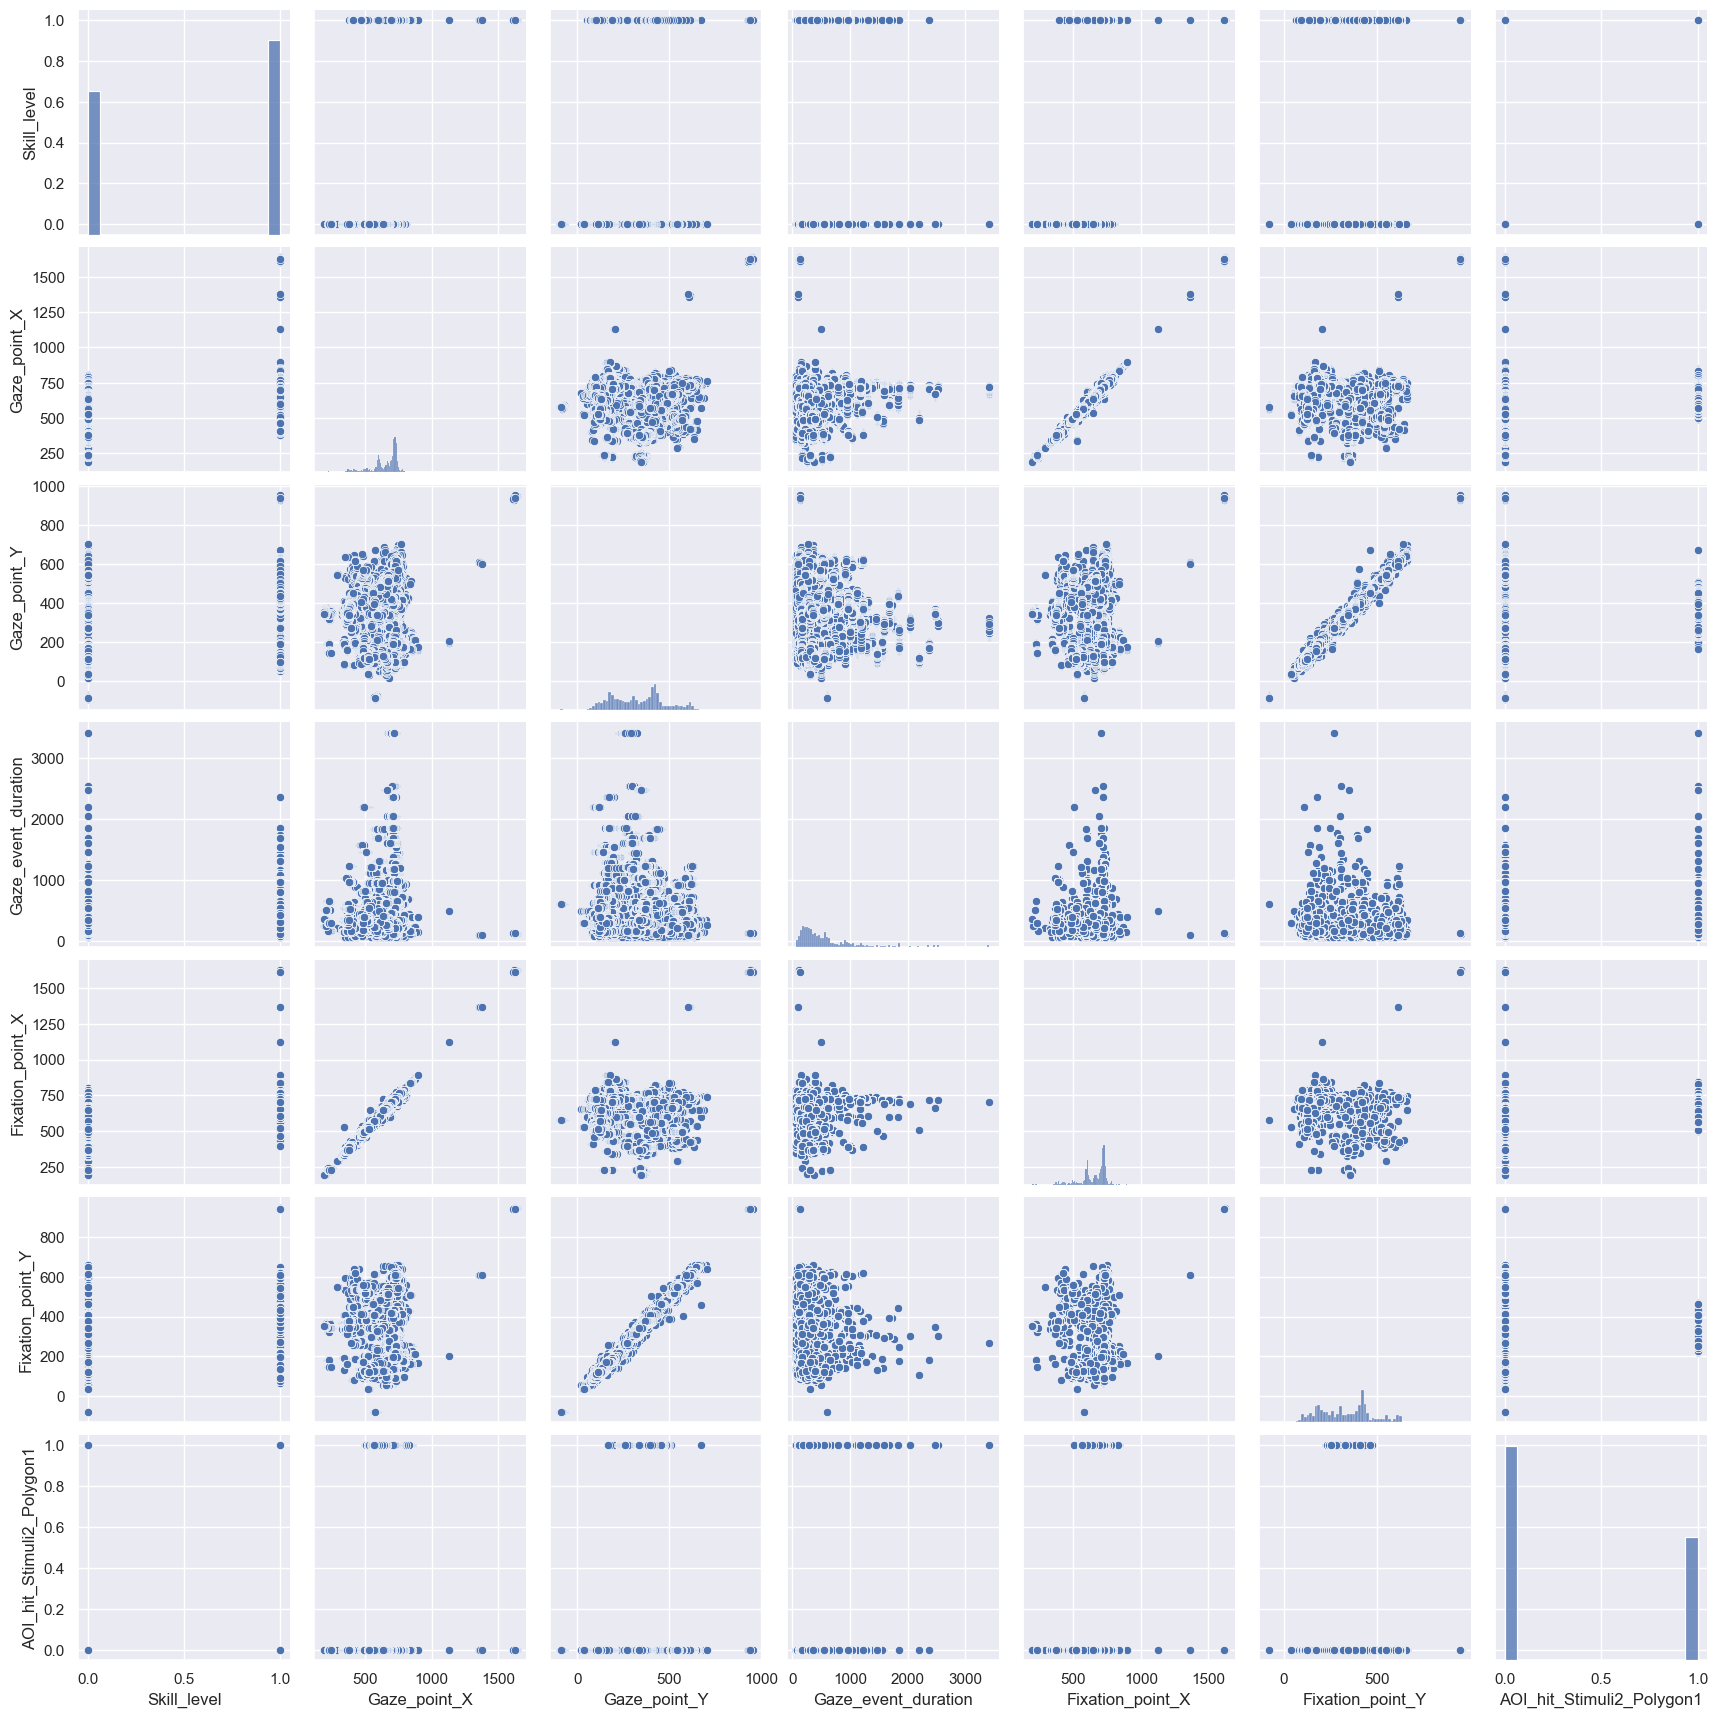

In [19]:
%%time

sns.pairplot(df[['Skill_level', 'Gaze_point_X', 'Gaze_point_Y', 'Gaze_event_duration', 'Fixation_point_X', 'Fixation_point_Y', 'AOI_hit_Stimuli2_Polygon1' ]])

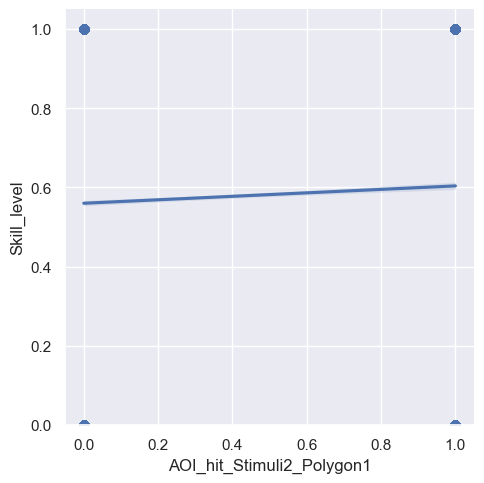

In [20]:
g= sns.lmplot(x='AOI_hit_Stimuli2_Polygon1', y='Skill_level', data=df)
g.set(ylim=(0, None))
plt.show()

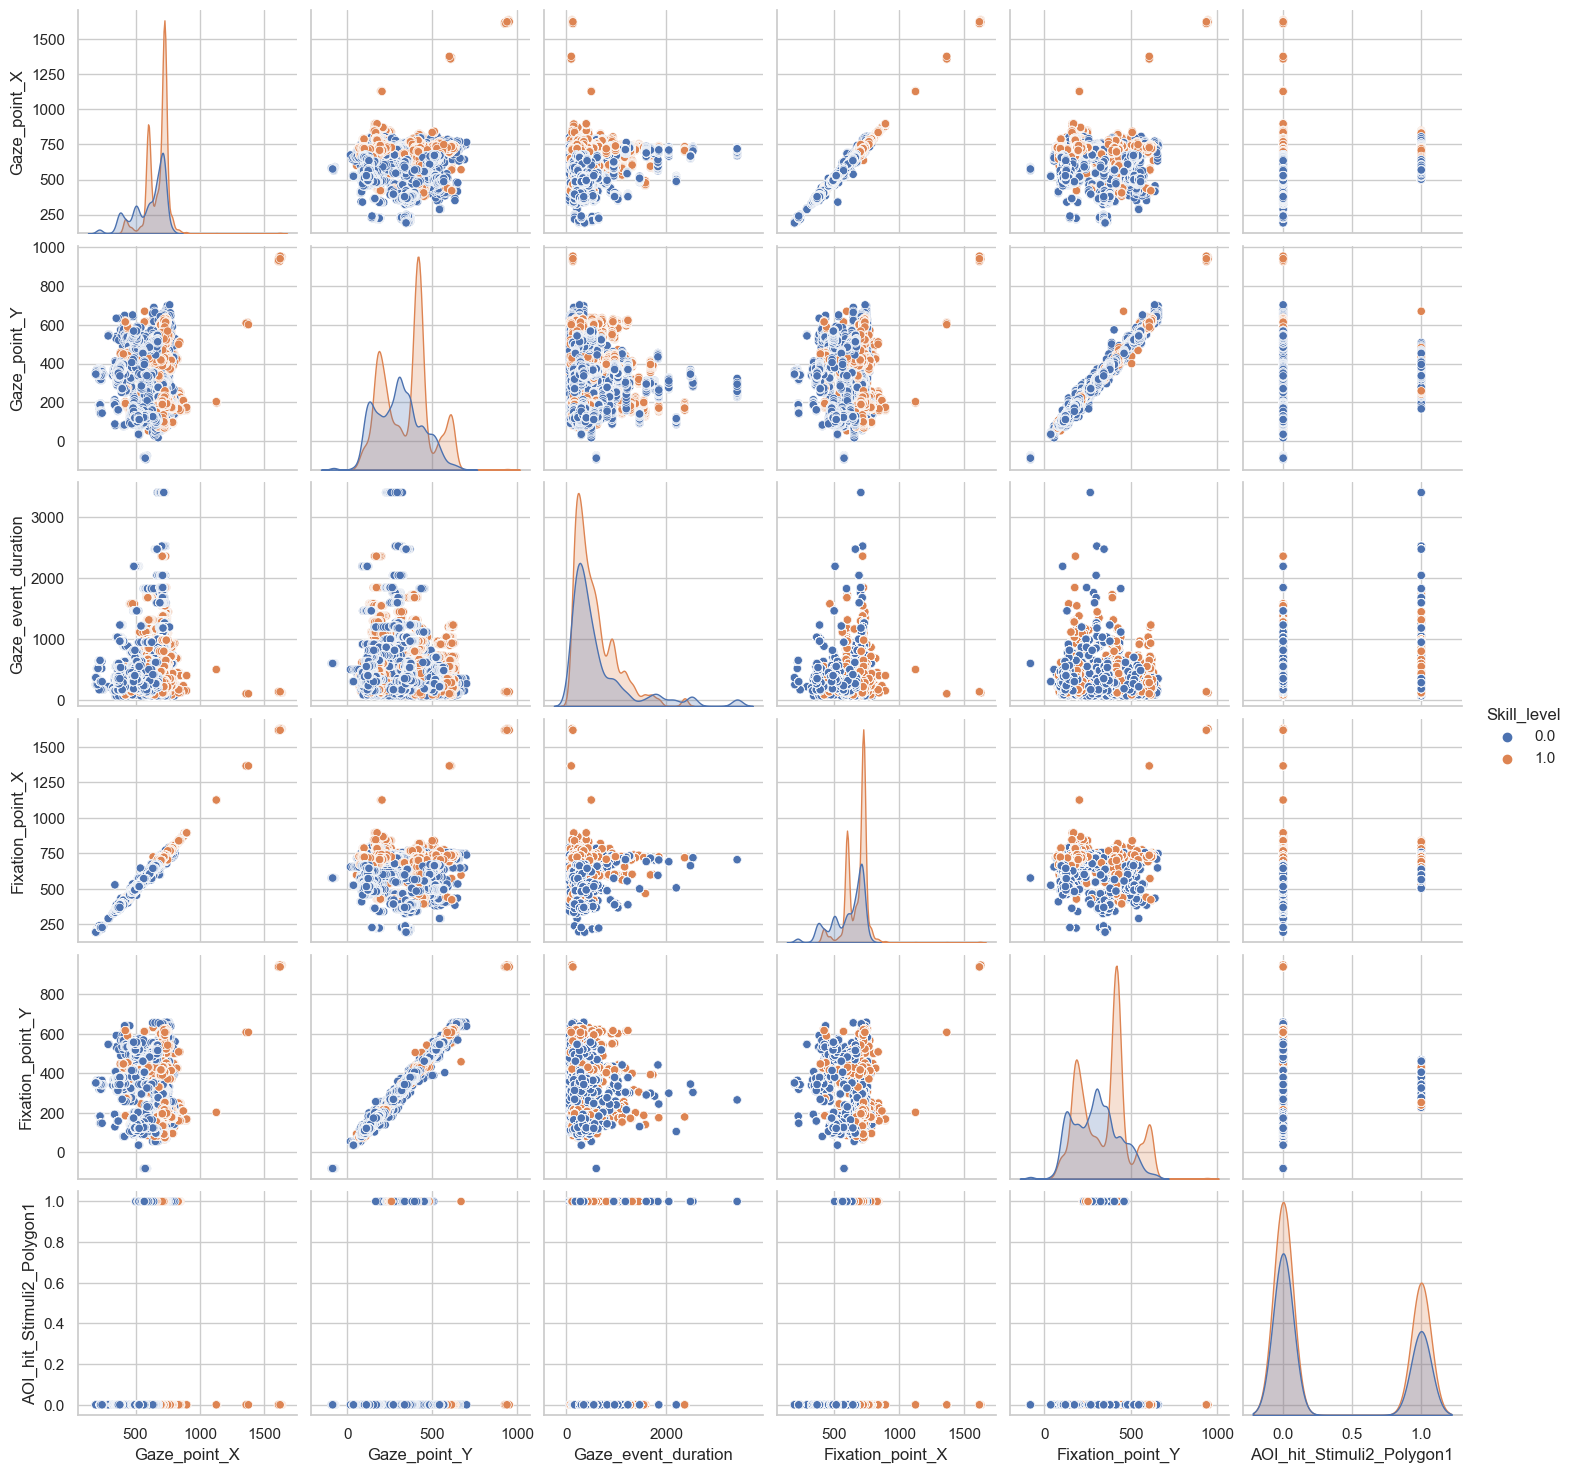

In [21]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Skill_level')

In [22]:
y = df['Skill_level']
X = df.drop('Skill_level', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

np.round(len(X_train)/len(X),3)

0.8

In [23]:
reg_model = LinearRegression()


In [24]:
X_train.head()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli2_Polygon1
8677,672,280,183,688,272,1
14441,536,159,1115,563,154,0
3092,734,253,549,734,253,1
23759,461,131,200,462,132,0
17603,574,448,1830,595,443,1


In [25]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_hat = reg_model.predict(X_test)

In [27]:
df_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat, 'resid': y_test - y_hat})
df_predictions.head()

,actuals,predictions,resid
17861,0.0,0.640582,-0.640582
6004,1.0,0.805379,0.194621
26253,0.0,0.233176,-0.233176
3533,1.0,0.533282,0.466718
22294,1.0,0.634172,0.365828


In [28]:
reg_model.coef_

array([-4.47260425e-04, -8.88819585e-05, -7.35655938e-05,  1.81965032e-03,
        6.74476480e-04,  7.04817490e-03])

In [29]:
reg_model.intercept_

-0.458300996624148

In [30]:
reg_summary = pd.DataFrame(data= X_train.columns, columns=['Features'])
reg_summary ['Coefficients'] = np.round(reg_model.coef_,4)
reg_summary

,Features,Coefficients
0,Gaze_point_X,-0.0004
1,Gaze_point_Y,-0.0001
2,Gaze_event_duration,-0.0001
3,Fixation_point_X,0.0018
4,Fixation_point_Y,0.0007
5,AOI_hit_Stimuli2_Polygon1,0.0070


In [31]:
reg_model.score(X_train, y_train)

0.1287359086231794

In [32]:
print('Training data R-squared:', np.round(reg_model.score(X_train, y_train),3))
print('Test data R-squared:', np.round(reg_model.score(X_train, y_train),3))

Training data R-squared: 0.129
Test data R-squared: 0.129


In [33]:
X_train.shape

(21198, 6)

In [34]:
def adj_R2(X,y):
    R2 = reg_model.score(X,y)
    n = X.shape[0]
    k = X.shape[1]
    return np.round(1-(1-R2)*(n-1)/(n-k-1),3)

In [35]:
adj_R2(X_train, y_train)

0.128

In [36]:
df_predictions.head()

,actuals,predictions,resid
17861,0.0,0.640582,-0.640582
6004,1.0,0.805379,0.194621
26253,0.0,0.233176,-0.233176
3533,1.0,0.533282,0.466718
22294,1.0,0.634172,0.365828


In [37]:
MSE_test = np.mean(np.square(df_predictions['resid']))
np.round(MSE_test,3)

0.215

In [38]:
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.464

In [39]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [40]:
my_estimator = LinearRegression()

In [41]:
R2 = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="r2")

In [42]:
R2

array([0.1232942 , 0.13091582, 0.13337475, 0.12966774, 0.1240713 ])

In [43]:
R2_CV = np.mean(R2)
np.round(R2_CV,3)

0.128

In [44]:
NMSE = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="neg_mean_squared_error")

In [45]:
MSE = -NMSE
MSE

array([0.21442932, 0.21244375, 0.21023409, 0.21176786, 0.21455102])